In [305]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np

from sympy import init_printing
init_printing()

%matplotlib inline
from sympy import *

import math

# Predicting an Astrometric signal

## Calculating velocity of the star

Proper motion and distance are given

In [332]:
proper_motion_mas_yr = 50
proper_motion_as_yr = proper_motion_mas_yr * 0.001
print('The proper motion is:',proper_motion_as_yr,'as/year ')

D = 50
print('The distance to the star is',D,'pc')

The proper motion is: 0.05 as/year 
The distance to the star is 50 pc


Use the equation $v_T=4.74D\mu$

In [334]:
v_star_kms = 4.74*proper_motion_as_yr*D
v_star_AUyear = v_star_kms * (1/1.496e+8) * (3.154e+7)
print('The velocity of the star is',v_star_kms,'km/s or',v_star_AUyear,'AU/years')

The velocity of the star is 11.850000000000001 km/s or 2.4983221925133696 AU/years


Setting the timescale as 4.2 years 

In [ ]:
timescale = 4.2

Setting the masses for earth and the sun in solar units for later calculations

In [ ]:
m_sun = 1 
m_earth = 3.0027e-6

## Simulation WITHOUT planet 

In [335]:
sim = rebound.Simulation()                                # starting simulation named sim 

sim.units=["msun","AU","year"]                            # setting units of sim 
print('The units for this simulation are:',sim.units)     # printing units of sim 

sim.add(m=1)                                              # add the Sun as the central object 

sim.add(m=3.0027e-6, a=1, e=0)                            # add Earth in a 1 AU circular orbit 

sim.add(m=1, x = 1.031e7, vy = v_star_AUyear)             # add a hypothetical star 50 pc away with calculated velocity (guessed its mass)

The units for this simulation are: {'length': 'au', 'mass': 'msun', 'time': 'year'}


Creating arrays with a length of 50 to hold specific values

In [308]:
n=50

# x,y and z positions of the sun, earth and star 
x_pos_sun, y_pos_sun, z_pos_sun  = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))
x_pos_earth, y_pos_earth, z_pos_earth = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))
x_pos_star, y_pos_star, z_pos_star = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# x,y and z positions of COM of sun-earth system
x_cm, y_cm, z_cm = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# x components of position vectors 
r_COM_x, r_earth_x, r_star_x, r_SE_x, r_SC_x = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# y components of position vectors 
r_COM_y, r_earth_y, r_star_y, r_SE_y,r_SC_y = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# z components of position vectors 
r_COM_z, r_earth_z, r_star_z, r_SE_z, r_SC_z = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# length of porision vectors 
r_COM, r_earth, r_star, r_SE, r_SC = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# right ascension and declination
alpha = np.empty((1,n))
delta = np.empty((1,n))

times = np.linspace(0,timescale,num=n)

Creating a for loop to fill the arrays that were created

In [309]:
for i,t in enumerate(times):
    sim.integrate(t)
    
    # x,y and z positions of the sun
    x_pos_sun[0,i] = sim.particles[0].x
    y_pos_sun[0,i] = sim.particles[0].y
    z_pos_sun[0,i] = sim.particles[0].z
    
    # x,y and z positions of earth 
    x_pos_earth[0,i] = sim.particles[1].x
    y_pos_earth[0,i] = sim.particles[1].y
    z_pos_earth[0,i] = sim.particles[1].z
    
    # x,y and z positions of the star
    x_pos_star[0,i] = sim.particles[2].x
    y_pos_star[0,i] = sim.particles[2].y
    z_pos_star[0,i] = sim.particles[2].z
    
    # x,y and z positions of sun-earth system
    x_cm[0,i] = (sim.particles[0].x*m_sun+ sim.particles[1].x*m_earth)/(m_sun+m_earth)
    y_cm[0,i] = (sim.particles[0].y*m_sun+ sim.particles[1].y*m_earth)/(m_sun+m_earth)
    z_cm[0,i] = (sim.particles[0].z*m_sun+ sim.particles[1].z*m_earth)/(m_sun+m_earth)
    
    # position vector x components
    r_COM_x[0,i]   = x_cm[0,i]        - x_pos_sun[0,i]
    r_earth_x[0,i] = x_pos_earth[0,i] - x_pos_sun[0,i]
    r_star_x[0,i]  = x_pos_star[0,i]  - x_pos_sun[0,i]
    r_SE_x[0,i]    = r_earth_x[0,i]   - r_star_x[0,i]
    r_SC_x[0,i]    = r_COM_x[0,i]     - r_star_x[0,i]

    # position vector y components 
    r_COM_y[0,i]   = y_cm[0,i]        - y_pos_sun[0,i]
    r_earth_y[0,i] = y_pos_earth[0,i] - y_pos_sun[0,i]
    r_star_y[0,i]  = y_pos_star[0,i]  - y_pos_sun[0,i]
    r_SE_y[0,i]    = r_earth_y[0,i]   - r_star_y[0,i]
    r_SC_y[0,i]    = r_COM_y[0,i]     - r_star_y[0,i]
    
    # position vector z components 
    r_COM_z[0,i]   = z_cm[0,i]        - z_pos_sun[0,i]
    r_earth_z[0,i] = z_pos_earth[0,i] - z_pos_sun[0,i]
    r_star_z[0,i]  = z_pos_star[0,i]  - z_pos_sun[0,i]
    r_SE_z[0,i]    = r_earth_z[0,i]   - r_star_z[0,i]
    r_SC_z[0,i]    = r_COM_z[0,i]     - r_star_z[0,i]
    
    
    # position vector lengths 
    r_COM[0,i]   = np.sqrt(r_COM_x[0,i]**2   + r_COM_y[0,i]**2   + r_COM_z[0,i]**2)
    r_earth[0,i] = np.sqrt(r_earth_x[0,i]**2 + r_earth_y[0,i]**2 + r_earth_z[0,i]**2)
    r_star[0,i]  = np.sqrt(r_star_x[0,i]**2  + r_star_y[0,i]**2  + r_star[0,i]**2)
    r_SE[0,i]    = np.sqrt(r_SE_x[0,i]**2    + r_SE_y[0,i]**2    + r_SE_z[0,i]**2)
    r_SC[0,i]    = np.sqrt(r_SC_x[0,i]**2    + r_SC_y[0,i]**2    + r_SE_z[0,i]**2)

    # calculating RA and Dec
    alpha[0,i] = (np.arctan(r_SE_y[0,i]/r_SE_x[0,i]))*1e6
    delta[0,i] = (np.arccos(r_SE[0,i]/ np.sqrt(r_SE_x[0,i]**2+r_SE_y[0,i]**2)))*1e6

Comment/ un-comment speficic lines depending on what arrays you want printed out 

In [336]:
#print('x-position of sun:', x_pos_sun)
#print('y-position of sun:', y_pos_sun)

print('x-position of earth:', x_pos_earth)
print('y-position of earth:', y_pos_earth)

#print('x-position of star:', x_pos_star)
#print('y-position of star:', y_pos_star)

#print('xcm of sun earth system:', x_cm)
#print('ycm of sun earth system:', y_cm)

#print('r_COM :', r_COM)
#print('r_earth :', r_earth)
#print('r_star :', r_star)
#print('r_SE :', r_SE)
#print('r_SC :', r_SC)

#print('Values of RA are:',alpha)
#print('Values of Dec are:',delta)

x-position of earth: [[ 1.          0.85845402  0.47388673 -0.04483363 -0.55086107 -0.90094285
  -0.99597333 -0.80905008 -0.39308972  0.13415236  0.62341773  0.93619887
   0.98394969  0.75315228  0.30914373 -0.22238034 -0.69094929 -0.96391461
  -0.96400178 -0.69118614 -0.22269982  0.30883207  0.75293667  0.98389116
   0.93631399  0.62367392  0.13447709 -0.39278838 -0.80885744 -0.99594393
  -0.90108499 -0.55113453 -0.045161    0.47359814  0.8582859   0.99999995
   0.85862205  0.47417527 -0.04450626 -0.55058755 -0.9008006  -0.99600264
  -0.80924264 -0.39339102  0.13382762  0.62316147  0.93608364  0.98400812
   0.75336782  0.30945536]]
y-position of earth: [[ 2.41751064e-14  5.12891317e-01  8.80587248e-01  9.98996178e-01
   8.34597847e-01  4.33932699e-01 -8.95733866e-02 -5.87719144e-01
  -9.19482634e-01 -9.90943540e-01 -7.81871336e-01 -3.51452402e-01
   1.78465215e-01  6.57866107e-01  9.51035786e-01  9.74980483e-01
   7.22922083e-01  2.66216965e-01 -2.65844479e-01 -7.22639022e-01
  -9.748

Creating a plot for the x and y positions of the objects 

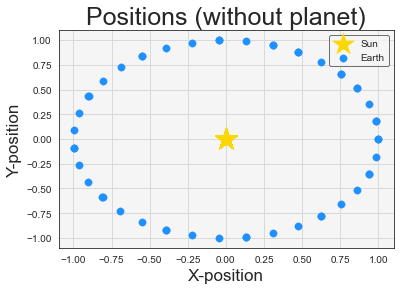

In [311]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting data 
plt.scatter(x_pos_sun, y_pos_sun, color='gold', label='Sun', s=550,marker='*') 
plt.scatter(x_pos_earth, y_pos_earth, color='dodgerblue', label='Earth', s=55) 
#plt.scatter(x_pos_star, y_pos_star, color='darkorange', label='Star', s=55, marker='*') 

# setting titles
plt.title('Positions (without planet)',fontsize = 25)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
       
plt.show()  

## Simulation WITH planet

In [337]:
sim_wp = rebound.Simulation()                                                # create a simulation called sim_wp 
sim_wp.units=["msun","AU","year"]                                            # setting the units for sim_wpm
print('The units for sim are:',sim_wp.units)                                 # printing the units for sim_wp

sim_wp.add(m=1)                                                              # add Sun as the central object 

sim_wp.add(m=3.0027e-6, a=1, e=0)                                            # add Earth in a 1 AU circular orbit 

sim_wp.add(m=1, x = 1.031e7, vy=v_star_AUyear)                               # add a hypothetical star 50 pc away with calculated mass (guessed its mass)

sim_wp.add(m = 0.00477294, a = 0.6, e = 0.2, primary = sim_wp.particles[2])  # add planet from figure 3.1 caption and have it orbit the star 

The units for sim are: {'length': 'au', 'mass': 'msun', 'time': 'year'}


Creating arrays to hold data 

In [318]:
# x,y and z positions of the sun, earth, star and planet
x_pos_sun_wp, y_pos_sun_wp, z_pos_sun_wp  = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))
x_pos_earth_wp, y_pos_earth_wp, z_pos_earth_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))
x_pos_star_wp, y_pos_star_wp, z_pos_star_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))
x_pos_planet, y_pos_planet, z_pos_planet = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)) 

# x,y and z positions of COM of sun-earth system
x_cm_wp, y_cm_wp, z_cm_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# x components of position vectors 
r_COM_x_wp, r_earth_x_wp, r_star_x_wp, r_SE_x_wp, r_SC_x_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# y components of position vectors 
r_COM_y_wp, r_earth_y_wp, r_star_y_wp, r_SE_y_wp, r_SC_y_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))


# z components of position vectors 
r_COM_z_wp, r_earth_z_wp, r_star_z_wp, r_SE_z_wp, r_SC_z_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# length of porision vectors 
r_COM_wp, r_earth_wp, r_star_wp, r_SE_wp, r_SC_wp = np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n)), np.empty((1,n))

# right ascension and declination
alpha_wp = np.empty((1,n))
delta_wp = np.empty((1,n))

times_wp = np.linspace(0,timescale,num=n)

Filling arrays with data using a for loop

In [338]:
for j,t_wp in enumerate(times_wp):
    sim_wp.integrate(t_wp)
    
    # x,y and z positions of the sun
    x_pos_sun_wp[0,j] = sim_wp.particles[0].x
    y_pos_sun_wp[0,j] = sim_wp.particles[0].y
    z_pos_sun_wp[0,j] = sim_wp.particles[0].z
    
    # x,y and z positions of earth 
    x_pos_earth_wp[0,j] = sim_wp.particles[1].x
    y_pos_earth_wp[0,j] = sim_wp.particles[1].y
    z_pos_earth_wp[0,j] = sim_wp.particles[1].z
    
    # x,y and z positions of the star
    x_pos_star_wp[0,j] = sim_wp.particles[2].x
    y_pos_star_wp[0,j] = sim_wp.particles[2].y
    z_pos_star_wp[0,j] = sim_wp.particles[2].z
    
    # x,y and z positions of the planet
    x_pos_planet[0,j] = sim_wp.particles[3].x
    y_pos_planet[0,j] = sim_wp.particles[3].y
    z_pos_planet[0,j] = sim_wp.particles[3].z
    
    # x,y and z positions of sun-earth system
    x_cm_wp[0,i] = (sim_wp.particles[0].x*m_sun+ sim_wp.particles[1].x*m_earth)/(m_sun+m_earth)
    y_cm_wp[0,i] = (sim_wp.particles[0].y*m_sun+ sim_wp.particles[1].y*m_earth)/(m_sun+m_earth)
    z_cm_wp[0,i] = (sim_wp.particles[0].z*m_sun+ sim_wp.particles[1].z*m_earth)/(m_sun+m_earth)
    
    # position vector x components
    r_COM_x_wp[0,i]   = x_cm_wp[0,i]        - x_pos_sun_wp[0,i]
    r_earth_x_wp[0,i] = x_pos_earth_wp[0,i] - x_pos_sun_wp[0,i]
    r_star_x_wp[0,i]  = x_pos_star_wp[0,i]  - x_pos_sun_wp[0,i]
    r_SE_x_wp[0,i]    = r_earth_x_wp[0,i]   - r_star_x_wp[0,i]
    r_SC_x_wp[0,i]    = r_COM_x_wp[0,i]     - r_star_x_wp[0,i]

    # position vector y components 
    r_COM_y_wp[0,i]   = y_cm_wp[0,i]        - y_pos_sun_wp[0,i]
    r_earth_y_wp[0,i] = y_pos_earth_wp[0,i] - y_pos_sun_wp[0,i]
    r_star_y_wp[0,i]  = y_pos_star_wp[0,i]  - y_pos_sun_wp[0,i]
    r_SE_y_wp[0,i]    = r_earth_y_wp[0,i]   - r_star_y_wp[0,i]
    r_SC_y_wp[0,i]    = r_COM_y_wp[0,i]     - r_star_y_wp[0,i]
    
    # position vector z components 
    r_COM_z_wp[0,i]   = z_cm_wp[0,i]        - z_pos_sun_wp[0,i]
    r_earth_z_wp[0,i] = z_pos_earth_wp[0,i] - z_pos_sun_wp[0,i]
    r_star_z_wp[0,i]  = z_pos_star_wp[0,i]  - z_pos_sun_wp[0,i]
    r_SE_z_wp[0,i]    = r_earth_z_wp[0,i]   - r_star_z_wp[0,i]
    r_SC_z_wp[0,i]    = r_COM_z_wp[0,i]     - r_star_z_wp[0,i]
    
    
    # position vector lengths 
    r_COM_wp[0,i]   = np.sqrt(r_COM_x_wp[0,i]**2   + r_COM_y_wp[0,i]**2   + r_COM_z_wp[0,i]**2)
    r_earth_wp[0,i] = np.sqrt(r_earth_x_wp[0,i]**2 + r_earth_y_wp[0,i]**2 + r_earth_z_wp[0,i]**2)
    r_star_wp[0,i]  = np.sqrt(r_star_x_wp[0,i]**2  + r_star_y_wp[0,i]**2  + r_star_wp[0,i]**2)
    r_SE_wp[0,i]    = np.sqrt(r_SE_x_wp[0,i]**2    + r_SE_y_wp[0,i]**2    + r_SE_z_wp[0,i]**2)
    r_SC_wp[0,i]    = np.sqrt(r_SC_x_wp[0,i]**2    + r_SC_y_wp[0,i]**2    + r_SE_z_wp[0,i]**2)

    # calculating RA and Dec
    alpha_wp[0,i] = (np.arctan(r_SE_y_wp[0,i]/r_SE_x_wp[0,i]))*1e6
    delta_wp[0,i] = (np.arccos(r_SE_wp[0,i]/ np.sqrt(r_SE_x_wp[0,i]**2+r_SE_y_wp[0,i]**2)))*1e6

Printing the values of the arrays 

In [320]:
print('x-position of sun:', x_pos_sun_wp)
print('y-position of sun:', y_pos_sun_wp)

#print('x-position of earth:', x_pos_earth_wp)
#print('y-position of earth:', y_pos_earth_wp)

#print('x-position of star:', x_pos_star_wp)
#print('y-position of star:', y_pos_star_wp)

#print('xcm of sun earth system:', x_cm_wp)
#print('ycm of sun earth system:', y_cm_wp)

#print('r_COM :', r_COM_wp)
#print('r_earth :', r_earth_wp)
#print('r_star :', r_star_wp)
#print('r_SE :', r_SE_wp)
#print('r_SC :', r_SC_wp_wp)

#print('Values of RA are:',alpha_wp)
#print('Values of Dec are:',delta_wp)

x-position of sun: [[6.39389934e-21 4.25020113e-07 1.57976032e-06 3.13732196e-06
  4.65677055e-06 5.70796112e-06 5.99330918e-06 5.43203475e-06
  4.18303060e-06 2.59988081e-06 1.13076372e-06 1.91575822e-07
  4.81944570e-08 7.41209870e-07 2.07443439e-06 3.67044176e-06
  5.07741377e-06 5.89704679e-06 5.89730860e-06 5.07812512e-06
  3.67140130e-06 2.07537055e-06 7.41857728e-07 4.83707302e-08
  1.91230758e-07 1.12999518e-06 2.59890657e-06 4.18212668e-06
  5.43145732e-06 5.99322198e-06 5.70838915e-06 4.65759298e-06
  3.13830633e-06 1.58062836e-06 4.25526507e-07 1.84043883e-12
  4.24517354e-07 1.57889579e-06 3.13634094e-06 4.65595131e-06
  5.70753616e-06 5.99339942e-06 5.43261529e-06 4.18393774e-06
  2.60085846e-06 1.13153582e-06 1.91924547e-07 4.80218595e-08
  7.40565613e-07 2.07350169e-06]]
y-position of sun: [[1.91789360e-20 7.70434594e-08 5.90065103e-07 1.85162083e-06
  3.96236191e-06 6.78254137e-06 9.97157531e-06 1.30844598e-05
  1.56977482e-05 1.75294261e-05 1.85187472e-05 1.88434305e-0

Creating a plot for the positions of the objects 

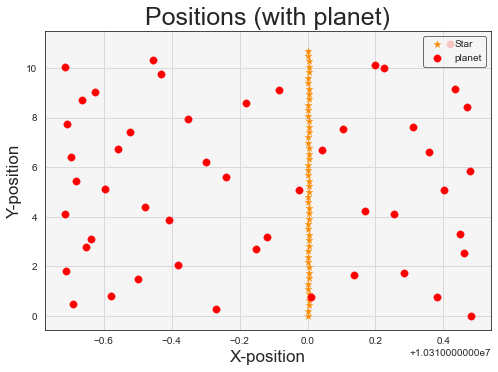

In [330]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting data 
#plt.scatter(x_pos_sun_wp, y_pos_sun_wp, color='gold', label='Sun', s=550,marker='*') 
#plt.scatter(x_pos_earth_wp, y_pos_earth_wp, color='dodgerblue', label='Earth', s=55) 
plt.scatter(x_pos_star_wp, y_pos_star_wp, color='darkorange', label='Star', s=55, marker='*') 
plt.scatter(x_pos_planet, y_pos_planet, color='red', s=55, label='planet') 

# creating titles 
plt.title('Positions (with planet)',fontsize = 25)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
         
plt.show() 

## Comparing astrometric signals

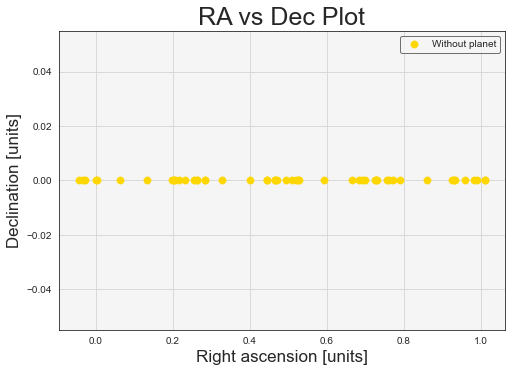

In [339]:
plt.clf() 

#plt.rcParams['figure.figsize'] = [15/2, 15/2]   

# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot data 
plt.scatter(alpha, delta, color='gold', label='Without planet', s=55) 
#plt.scatter(alpha_wp, delta_wp, color='dodgerblue', label='With planet', s=55) 

# set titles 
plt.title('RA vs Dec Plot',fontsize = 25)             
plt.xlabel('Right ascension [units]',fontsize = 17)                     
plt.ylabel('Declination [units]',fontsize = 17)

# plot legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1)
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)
       
plt.show() 

## Reproducing astrometric signal using equations 3.22 and 3.23

Setting variables (random for now)

In [340]:
planets = ['Earth', 'Planet from Figure 3.1']

a = [1,  0.6]           # semi-major axis in units of AU
omega = [2,2]           # argument of perihelion
OMEGA = [2,2]           # longitude of the ascending node 
i = [1.160644,2]         # orbital inclination (rad)

e = [0.0167,0.2]        # ellipticity of the orbit 
E = [2,2]               #eccentricity anomaly 

prop_RA = [1,2]         # proper motion in RA direction
prop_DEC = [1,2]        # proper motion in DEC direction 

# cartesian components of the observer position wrt the solar system barycentre
rx = [1,2]
ry = [2,2] 
rz = [3,2] 

alpha1 = [1,2]
delta1 = [1,2]

parallax = [1,2] 
change_RA = [1,2]
change_DEC = [1,2] 

t1 = 4.2 
t0 = 0

Using a loop to calculate and print the values 

In [344]:
n = len(planets)
print('The number of planets is:',n)
    
j = 0
for j in range(n):
    print('The planet we are calculating for is :', planets[j])
    
    A = a[j]*(math.cos(omega[j])*math.cos(OMEGA[j])-math.sin(omega[j])*math.sin(OMEGA[j])*math.cos(i[j]))
    print('A =',A)
    
    B = a[j]*(math.cos(omega[j])*math.sin(OMEGA[j])+math.sin(omega[j])*math.cos(OMEGA[j])*math.cos(i[j]))
    print('B =',B)
    
    F = a[j]*(-math.sin(omega[j])*math.cos(OMEGA[j])-math.cos(omega[j])*math.sin(OMEGA[j])*math.cos(i[j]))
    print('F =',F)
    
    G = a[j]*(-math.sin(omega[j])*math.sin(OMEGA[j])+math.cos(omega[j])*math.cos(OMEGA[j])*math.cos(i[j]))
    print('G =',G)
    
    X = math.cos(E[j])-e[j]
    print('X =',X)
    
    Y = sqrt(1-e[j]**2)*math.sin(E[j])
    print('Y = ', Y)
    
    PI_RA = rx[j]*math.sin(alpha1[j]) - ry[j]*math.cos(alpha1[j])
    print('PI_RA =',PI_RA)
    
    PI_DEC = (rx[j]*math.cos(alpha1[j])+ry[j]*math.sin(alpha1[j]))*math.sin(delta1[j]) - rz[j]*math.cos(delta1[j])
    print('PI_DEC =',PI_DEC)
    
    three22 = (B*X+G*Y)+change_RA[j]*math.cos(delta1[j])+parallax[j]*PI_RA+prop_RA[j]*(t-t0)
    print('3.22 =',three22)
    
    three23 = ((A*X)+(F*Y))+change_DEC[j] + parallax[j]*PI_DEC + prop_DEC[j]*(t-t0)
    print('3.23 =',three23)

The number of planets is: 2
The planet we are calculating for is : Earth
A = -0.1565162015497247
B = -0.5292883763792944
F = 0.5292883763792944
G = -0.7577671761149258
X = -0.4328468365471424
Y =  0.909170621004163
PI_RA = -0.23913362692838303
PI_DEC = 3.2700308085438943
3.22 = 3.08488068177645
3.23 = 9.01899179309612
The planet we are calculating for is : Planet from Figure 3.1
A = 0.3103544822205427
B = -0.1325584592983651
F = 0.1325584592983651
G = -0.5393336197077429
X = -0.6161468365471424
Y =  0.890925888059458
PI_RA = 2.650888526745648
PI_DEC = 1.7291347986499686
3.22 = 12.4706525716528
3.23 = 13.7851454279417
